In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime_data = pd.read_csv('Cleaned_df.csv')
crime_data.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0,2020,1,2020-01
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0,2020,1,2020-01


### Explore correlations between economic factors (if available) and crime rates

In [3]:
# Loading Monthly Inflation Data
infla = pd.read_csv("Inflation_rate.csv")

**Reference:**

https://data.bls.gov/pdq/SurveyOutputServlet - for Unemployment Data

https://www.bls.gov/regions/mid-atlantic/data/consumerpriceindexhistorical_us_table.htm - for Inflation Rate


In [4]:
# Displaying first 5 rows of the dataframe
infla.head()

,Date,Inflation Rate,Unemployment rate
0,2020-01,0.2,4.9
1,2020-02,0.1,4.9
2,2020-03,-0.4,6.7
3,2020-04,-0.8,17.0
4,2020-05,-0.1,19.0


In [5]:
# Creating a new dataframe with monthly crime counts
df = crime_data.copy()
df['Date Time OCC'] = pd.to_datetime(df['Date Time OCC'])
df['month-year'] = df['Date Time OCC'].dt.strftime('%m-%Y')
df = df.groupby('month-year')['Crm Cd'].mean()
df_1 = df.to_frame().reset_index()
df_1 = df_1.rename(columns={'month-year':'Date','Crm Cd':'Crime'})
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1['days_in_month'] = df_1['Date'].dt.days_in_month
df_1.head()

,Date,Crime,days_in_month
0,2020-01-01,510.458290,31
1,2021-01-01,504.323570,31
2,2022-01-01,493.799446,31
3,2023-01-01,488.039237,31
4,2020-02-01,513.959019,29


In [6]:
 # Creating a Dataset with Montly crimes from Jan 2020 and adding each month inflation to it.
df_1['Unemployment'] = infla['Unemployment rate']
df_1['Inflation'] = infla['Inflation Rate']

In [7]:
df_1.head()

,Date,Crime,days_in_month,Unemployment,Inflation
0,2020-01-01,510.458290,31,4.9,0.2
1,2021-01-01,504.323570,31,4.9,0.1
2,2022-01-01,493.799446,31,6.7,-0.4
3,2023-01-01,488.039237,31,17.0,-0.8
4,2020-02-01,513.959019,29,19.0,-0.1


              Crime  Inflation
Crime      1.000000   0.230833
Inflation  0.230833   1.000000


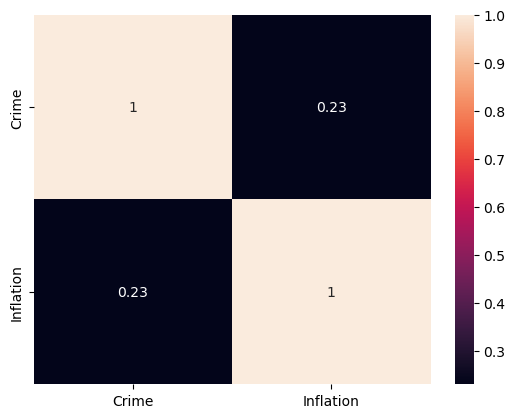

In [8]:
# Calculating the Correlation between Crime and Inflation
corr_matrix = df_1[['Crime', 'Inflation']].astype(float).corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

As we can observe from the above heatmap there is weak Positive Correlation (0.23) between Inflation rate and Crime rate.

                 Crime  Unemployment
Crime         1.000000     -0.057009
Unemployment -0.057009      1.000000


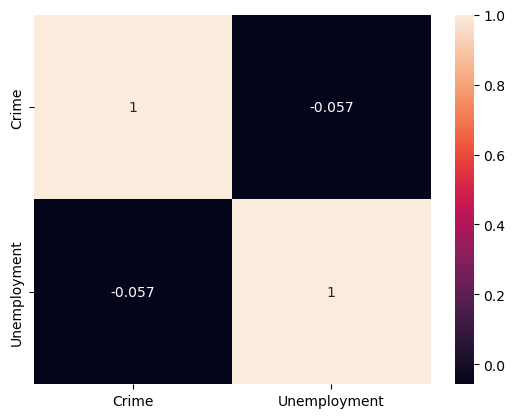

In [9]:
# Calculating the Correlation between Crime and Unemployment
corr_matrix = df_1[['Crime', 'Unemployment']].astype(float).corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

As we can observe from the above heatmap there is no Correlation (-0.057) between Unemployment rate and Crime rate.

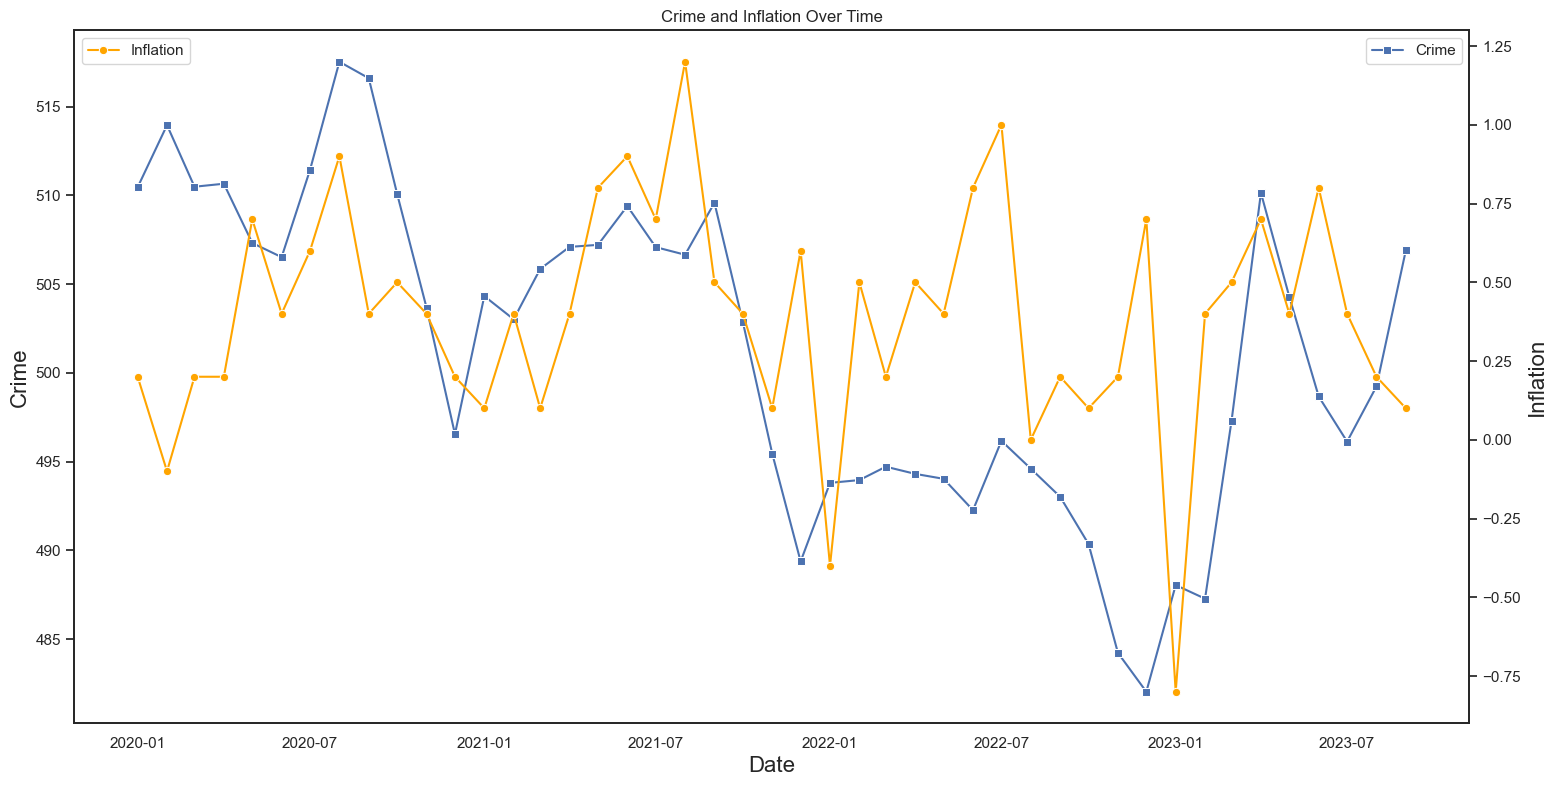

In [10]:
# Plotting the crime trend and Inflation rate over the years
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="white")

plt.figure(figsize=(18, 9))  # Adjust the figure size if needed
ax1 = sns.lineplot(x='Date', y='Crime', data=df_1, marker='s', label='Crime')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Inflation', data=df_1, ax=ax2, marker='o', color='orange', label='Inflation')

# Set labels and title
ax1.set_xlabel('Date', fontsize = 16)
ax1.set_ylabel('Crime', fontsize = 16)
ax2.set_ylabel('Inflation', fontsize = 16)
plt.title('Crime and Inflation Over Time')
plt.legend(loc = 'upper left') 
plt.show()

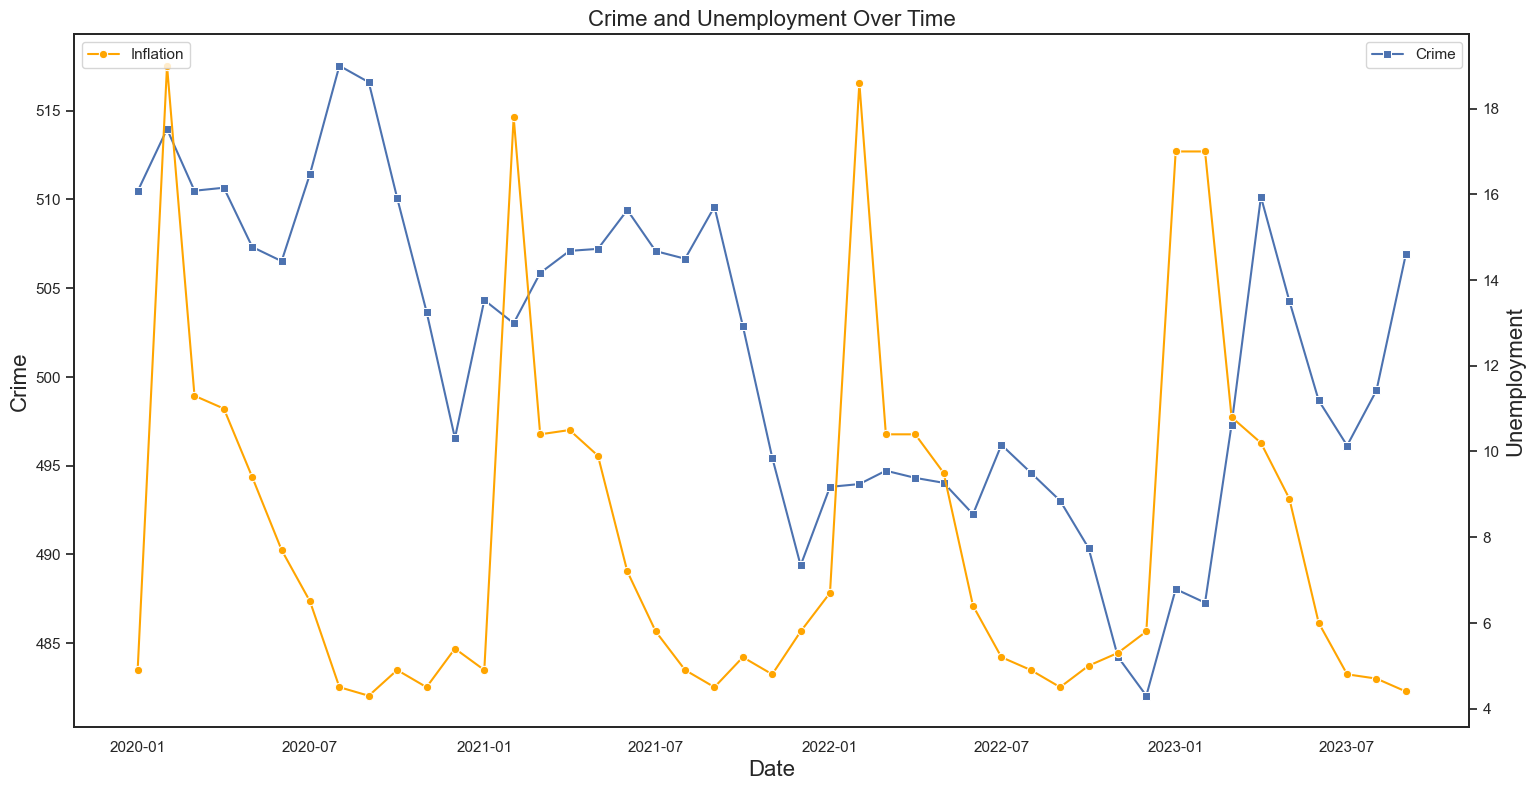

In [11]:
# Plotting Crime and Unemployment rate over the years
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="white")

plt.figure(figsize=(18, 9))  
ax1 = sns.lineplot(x='Date', y='Crime', data=df_1, marker='s', label='Crime')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Unemployment', data=df_1, ax=ax2, marker='o', color='orange', label='Inflation')

ax1.set_xlabel('Date',fontsize = 16)
ax1.set_ylabel('Crime',fontsize = 16)
ax2.set_ylabel('Unemployment',fontsize = 16)
plt.title('Crime and Unemployment Over Time',fontsize = 16)
plt.legend(loc = 'upper left') 
plt.show()